In [1]:
# In this code, we will attempt to run MNIST backwards, i.e. given a number, the neural net will output the image of that number.

In [2]:
#Import packages

import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils
import matplotlib.pyplot as plt
from Dense import Dense
from Activations import Tanh, ReLu, Sigmoid, Softmax, Binary
from Losses import mse, mse_prime
from Network import train, predict
from Visualize import visualize_network
import cv2


In [3]:

def preprocess_data(x, y, limit,new_dim=(28, 28)):
    # reshape and normalize input data
    x = x.reshape(x.shape[0], 28, 28)
    x = x.astype("float32") / 255
    
    # resize the images
    x_resized = []
    for img in x:
        img_resized = cv2.resize(img, new_dim, interpolation = cv2.INTER_AREA)
        x_resized.append(img_resized)
    x = np.array(x_resized)
    x = x.reshape(x.shape[0], new_dim[0] * new_dim[1], 1)
    
    # encode output which is a number in range [0,9] into a vector of size 10
    # e.g. number 3 will become [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
    y = np_utils.to_categorical(y)
    y = y.reshape(y.shape[0], 10, 1)
    
    return x[:limit], y[:limit]

new_dim = 28
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, y_train = preprocess_data(x_train, y_train, limit = 60000, new_dim = (new_dim, new_dim))

network = [
    Dense(10, new_dim*new_dim),
    Sigmoid()
]


In [4]:

costs = train(network, mse, mse_prime, y_train, x_train, epochs=1000000, batch_size = 1, learning_rate=1)

1/1000000, error=0.09330099698824625
2/1000000, error=0.06085943049341838
3/1000000, error=0.0569922933797021
4/1000000, error=0.05555125072142282
5/1000000, error=0.05486366678062924
6/1000000, error=0.05448798147486767
7/1000000, error=0.054268127800282645
8/1000000, error=0.05412284703962091
9/1000000, error=0.054016857195558515
10/1000000, error=0.053935235123148115
11/1000000, error=0.05387110170861798
12/1000000, error=0.05381955683851197
13/1000000, error=0.05377672726946126
14/1000000, error=0.05374071428639153
15/1000000, error=0.05371032648811582
16/1000000, error=0.05368400574136509
17/1000000, error=0.05366020732321863
18/1000000, error=0.053637207232564627
19/1000000, error=0.05361233272734383
20/1000000, error=0.053587872989164016
21/1000000, error=0.05357014935851017
22/1000000, error=0.053556613230220755
23/1000000, error=0.053544940692853114
24/1000000, error=0.053534346717420585


KeyboardInterrupt: 

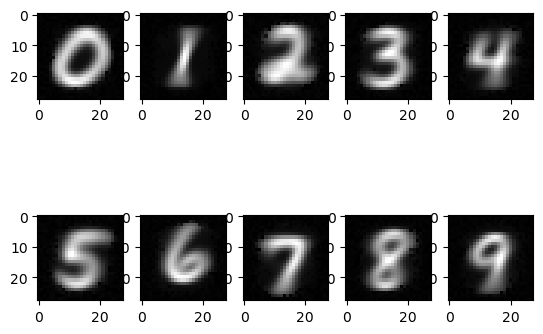

In [5]:
# Visualize each digit, feeding the network with the number and visualizing the output

#make a y for each digit
y = np.zeros((10,10,1))
for i in range(10):
    y[i][i] = 1

# Visualize each digit, feeding the network with the number and visualizing the output
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(predict(network, y[i]).reshape(new_dim, new_dim), cmap="gray")




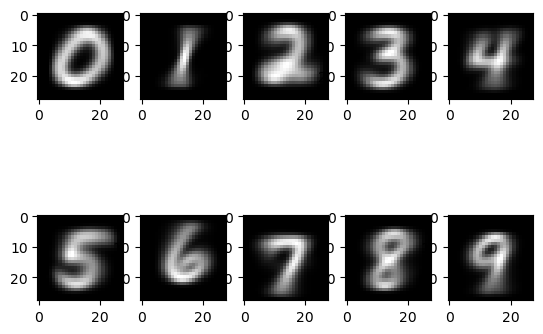

In [6]:

images = []
for i in range(10):
    images.append(np.zeros((new_dim,new_dim)))

for i in range(len(x_train)):
    images[np.argmax(y_train[i])] += x_train[i].reshape(new_dim,new_dim)

for i in range(10):
    images[i] /= np.sum(y_train[:,i])
    plt.subplot(2, 5, i+1)
    plt.imshow(images[i], cmap="gray")



